# Wine Quality Prediction using Wine Quality Dataset

Importing required libraries and dataset reading

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [54]:
df=pd.read_csv(r'C:\Users\kriti\Downloads\archive (2)\WineQT.csv')

In [55]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [56]:
df.isnull().sum()          #checking for missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [57]:
df.shape

(1143, 13)

In [58]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Data analysis

Text(0.5, 1.0, 'Correlation between variable')

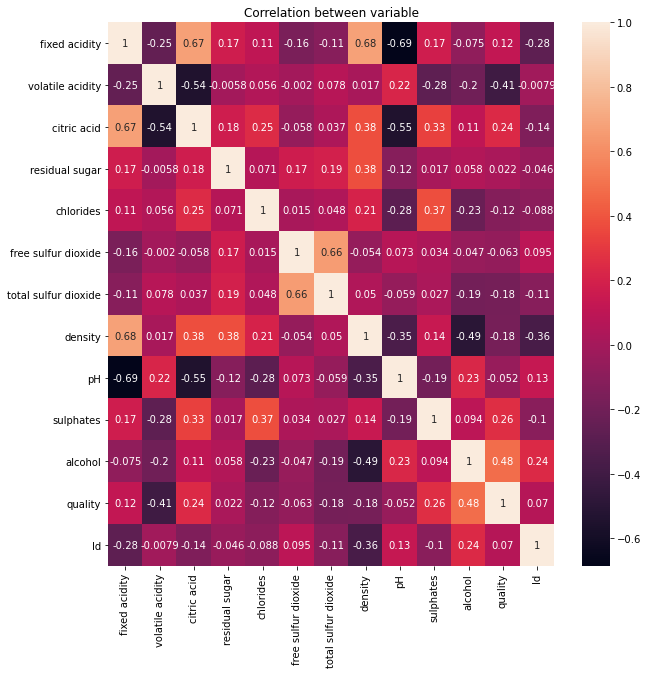

In [59]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(10,10))          #correlation matrix
g=seabornInstance.heatmap(corr,ax=ax,annot=True)
ax.set_title('Correlation between variable')

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

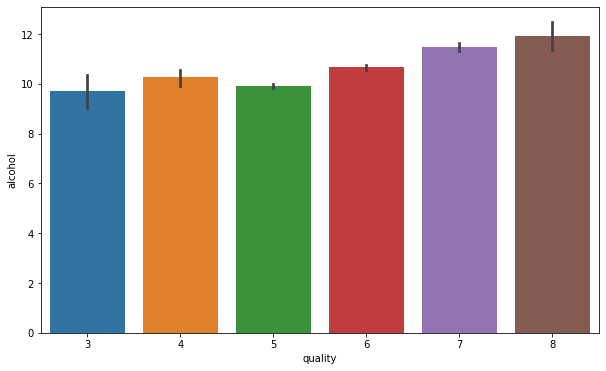

In [60]:
fig=plt.figure(figsize=(10,6))
seabornInstance.barplot(x='quality',y='alcohol',data=df)

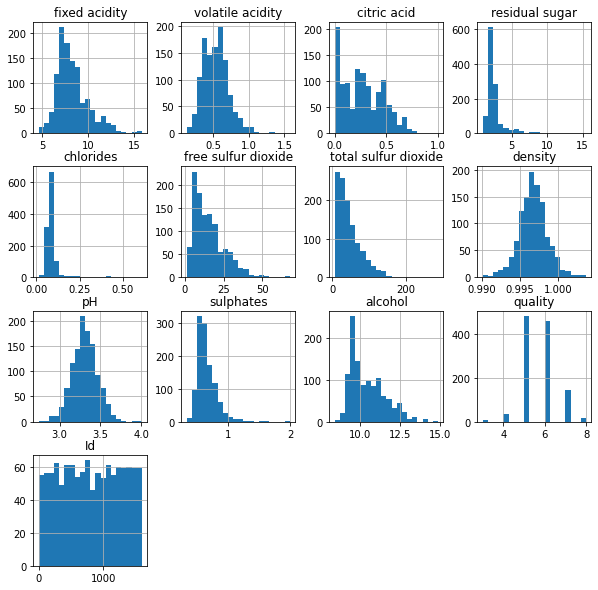

In [61]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

Model development

In [62]:
y=df.quality
x=df.drop("quality",axis=1)

In [63]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=0,stratify=y)

In [64]:
scaler=preprocessing.StandardScaler().fit(train_x)
train_x_scaled=scaler.transform(train_x)

In [65]:
test_x_scaled=scaler.transform(test_x)

In [66]:
model=RandomForestRegressor()
model.fit(train_x_scaled,train_y)
pred_y=model.predict(test_x_scaled)

In [67]:
mean_absolute_error(pred_y,test_y)

0.4529720279720279

In [68]:
test_y.head()

90     5
16     5
271    8
828    6
912    5
Name: quality, dtype: int64

In [69]:
pred_y

array([5.01, 5.  , 6.27, 6.78, 5.73, 5.1 , 5.22, 5.52, 6.59, 5.74, 6.39,
       6.1 , 5.35, 5.12, 5.79, 6.54, 6.27, 5.69, 5.06, 5.69, 5.33, 5.97,
       5.59, 5.02, 6.4 , 4.9 , 5.02, 5.03, 5.04, 5.94, 5.66, 5.08, 5.36,
       5.58, 5.35, 6.24, 6.04, 5.83, 5.38, 5.13, 6.23, 5.05, 5.9 , 5.68,
       5.65, 6.74, 5.81, 6.39, 5.1 , 5.6 , 5.46, 6.66, 5.11, 5.23, 6.13,
       6.92, 5.49, 5.74, 5.36, 5.24, 5.03, 5.45, 5.09, 5.4 , 5.61, 6.77,
       6.56, 5.97, 5.99, 5.31, 5.53, 5.26, 5.32, 6.3 , 5.01, 5.01, 5.18,
       5.2 , 5.85, 5.1 , 5.15, 5.71, 6.05, 5.17, 5.45, 5.11, 5.49, 6.51,
       5.22, 5.48, 5.1 , 6.01, 5.68, 5.67, 6.06, 6.02, 5.39, 5.07, 5.73,
       5.64, 5.16, 6.63, 5.82, 5.93, 5.26, 6.47, 5.  , 5.42, 5.46, 5.99,
       5.47, 6.38, 5.44, 5.51, 6.28, 5.63, 5.9 , 5.61, 5.16, 5.06, 5.16,
       5.2 , 5.81, 5.94, 5.21, 5.76, 4.95, 5.54, 5.5 , 5.5 , 6.52, 5.19,
       5.13, 5.04, 5.02, 6.05, 5.5 , 5.56, 7.1 , 5.11, 5.91, 5.83, 5.18,
       5.67, 4.91, 7.21, 5.71, 5.95, 4.98, 5.8 , 5.

In [70]:
model=RandomForestRegressor(n_estimators=36)
model.fit(train_x_scaled,train_y)
pred_y=model.predict(test_x_scaled)

In [71]:
mean_absolute_error(pred_y,test_y)

0.4566822066822067

In [72]:
model1=LogisticRegression(solver='liblinear',random_state=0)
model1.fit(train_x,train_y)
model1.score(test_x,test_y)

0.5874125874125874

In [73]:
#SVC
model2=SVC()
model2.fit(train_x,train_y)
model2.score(test_x,test_y)

0.45454545454545453

Model evaluation

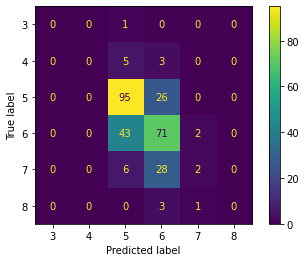

In [74]:

metrics.plot_confusion_matrix(model1,test_x,test_y)
plt.show()

In [75]:
print(metrics.classification_report(test_y,model1.predict(test_x)))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.63      0.79      0.70       121
           6       0.54      0.61      0.57       116
           7       0.40      0.06      0.10        36
           8       0.00      0.00      0.00         4

    accuracy                           0.59       286
   macro avg       0.26      0.24      0.23       286
weighted avg       0.54      0.59      0.54       286

